# **DATA PREPROCESSING**

In [1]:
# Let's start by loading the data and taking a preliminary look at it.
import pandas as pd
import numpy as np
# Load the dataset
file_path = 'diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Check for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

# Display the information
print('Missing values:')
print(missing_values)
print('\nData types:')
print(data_types)

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [3]:
# Replace zero values with NaN for the specified columns
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in zero_columns:
    data[column].replace(0, np.nan, inplace=True)


In [4]:
for column in zero_columns:
    data[column].fillna(data[column].median(), inplace=True)

# Confirm the changes
print(data[zero_columns].describe())

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


## FEATURE **SELECTION**

In [5]:
from sklearn.preprocessing import StandardScaler

# Define the features and the target without 'Unnamed: 0' column
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the head of the scaled features dataframe
X_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest class to extract top k best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X_scaled_df, y)

# Get the scores for each feature
feature_scores = pd.DataFrame(fit.scores_)
feature_columns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization
feature_scores_df = pd.concat([feature_columns, feature_scores], axis=1)
feature_scores_df.columns = ['Feature', 'Score']  # Naming the dataframe columns

# Print the best features sorted by score
feature_scores_df.sort_values(by='Score', ascending=False)

,Feature,Score
1,Glucose,245.667855
5,BMI,82.629271
7,Age,46.140611
0,Pregnancies,39.670227
3,SkinThickness,37.078538
4,Insulin,33.190796
6,DiabetesPedigreeFunction,23.871300
2,BloodPressure,21.631580


### **LOGISTIC REGRESSION**

In [7]:
class Logistic_Regression():


  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  # fit function to train the model with dataset
  def fit(self, X, Y):

    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape


    #initiating weight & bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y


    # implementing Gradient Descent for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):

    # Y_hat formula (sigmoid function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))


    # derivaties

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))

    db = (1/self.m)*np.sum(Y_hat - self.Y)


    # updating the weights & bias using gradient descent

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

    # learning_rate=0.01, no_of_iterations=1000

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
logreg = LogisticRegression()

# Train the classifier on the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)


### **PERFORMANCE METRICS**

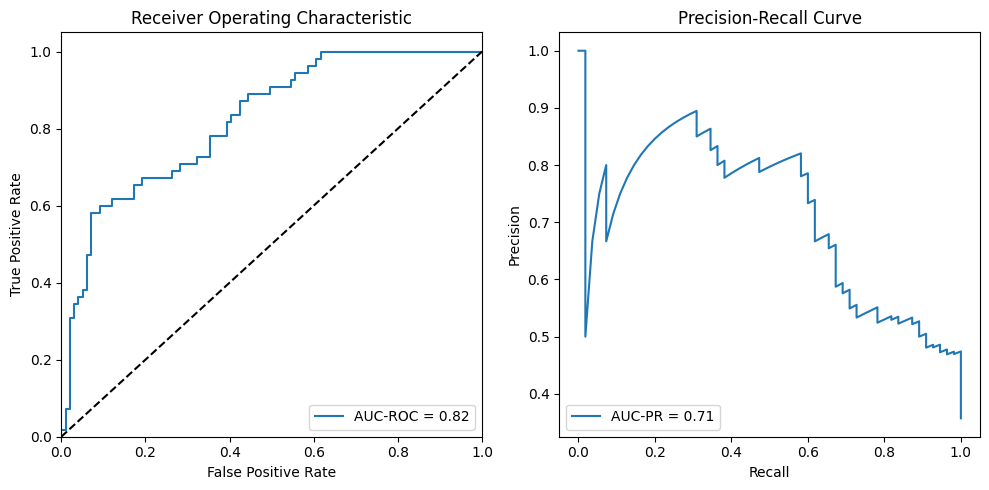

AUC-ROC: 0.8229568411386594
AUC-PR: 0.7063279619798158


In [12]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate the probability scores of each point in the test set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate precision and recall for various threshold values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

# Calculate AUC for precision-recall curve
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='AUC-ROC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='AUC-PR = %0.2f' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Print AUC-ROC and AUC-PR
print('AUC-ROC:', roc_auc)
print('AUC-PR:', pr_auc)

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7532467532467533


In [14]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[82 17]
 [21 34]]


In [15]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



# **cross-validation to get a more robust estimate of our model's performance.**

In [16]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
scores = cross_val_score(logreg, X_scaled, y, cv=10)

# Calculate the average accuracy and standard deviation
average_accuracy = scores.mean()
std_deviation = scores.std()

print('Average Accuracy:', average_accuracy)
print('Standard Deviation:', std_deviation)

Average Accuracy: 0.7669514695830485
Standard Deviation: 0.037974354251593914


# **analyze the feature importance for the logistic regression model to understand which features are contributing most to the predictions**.

In [17]:
# Get the feature importance
feature_importance = pd.DataFrame(logreg.coef_[0],
                                  index=X.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)

print(feature_importance)

                          importance
Glucose                     1.114557
BMI                         0.683084
Age                         0.401036
Pregnancies                 0.226698
DiabetesPedigreeFunction    0.200348
SkinThickness               0.071550
Insulin                    -0.135427
BloodPressure              -0.151446


In [18]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming the feature selection and preprocessing has been done.
X = data[['Insulin', 'Glucose', 'Age', 'Pregnancies', 'BMI', 'DiabetesPedigreeFunction','BloodPressure', 'SkinThickness']]
y = data['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'diabetes_model.sav'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_classifier, file)

print('Model saved as:', model_filename)

Model saved as: diabetes_model.sav


In [ ]:

# Load the trained model from file
model_filename = 'diabetes_model.sav'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)


# The values are in the order: ['Insulin', 'Glucose', 'Age', 'Pregnancies', 'BMI' 'DiabetesPedigreeFunction','BloodPressure', 'SkinThickness']
random_sample = np.array([[0, 148, 50, 6, 33.6,0.627,72,35]])


predicted_outcome = loaded_model.predict(random_sample)

# Print the predicted outcome
print('Predicted Outcome:', 'Diabetic' if predicted_outcome[0] == 1 else 'Non-diabetic')

Predicted Outcome: Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
